In [154]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [155]:
import yfinance as yf
from datetime import datetime


In [156]:
def get_stock_data(ticker):
    start_year = datetime.now().year - 4
    start_date = f'{start_year}-01-01'
    df= yf.download(ticker, start= start_date,end=datetime.today().strftime('%Y-%m-%d'))
    return df

In [157]:
ticker = input("Enter the ticker symbol: ").upper()
df = get_stock_data(ticker)
current_data = df.iloc[-1:]
print(f"Current data for {ticker}:")
print(current_data)

Enter the ticker symbol:  AAPL


[*********************100%***********************]  1 of 1 completed

Current data for AAPL:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-01-24  222.779999  225.630005  221.410004  224.779999  54619500


In [158]:

df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['SMA_200'] = df['Close'].rolling(window=200).mean()

In [159]:
df

Price,Close,High,Low,Open,Volume,SMA_50,SMA_200
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2021-01-04,126.544220,130.651208,123.952903,130.563205,143301900,NaN,NaN
2021-01-05,128.108795,128.822640,125.585927,126.035747,97664900,NaN,NaN
2021-01-06,123.796448,128.147907,123.581318,124.891648,155088000,NaN,NaN
2021-01-07,128.020767,128.715051,125.028533,125.517461,109578200,NaN,NaN
2021-01-08,129.125763,129.692921,127.346060,129.497338,105158200,NaN,NaN
...,...,...,...,...,...,...,...
2025-01-17,229.979996,232.289993,228.479996,232.119995,68488300,239.281792,216.704733
2025-01-21,222.639999,224.419998,219.380005,224.000000,98070400,239.270504,216.972742


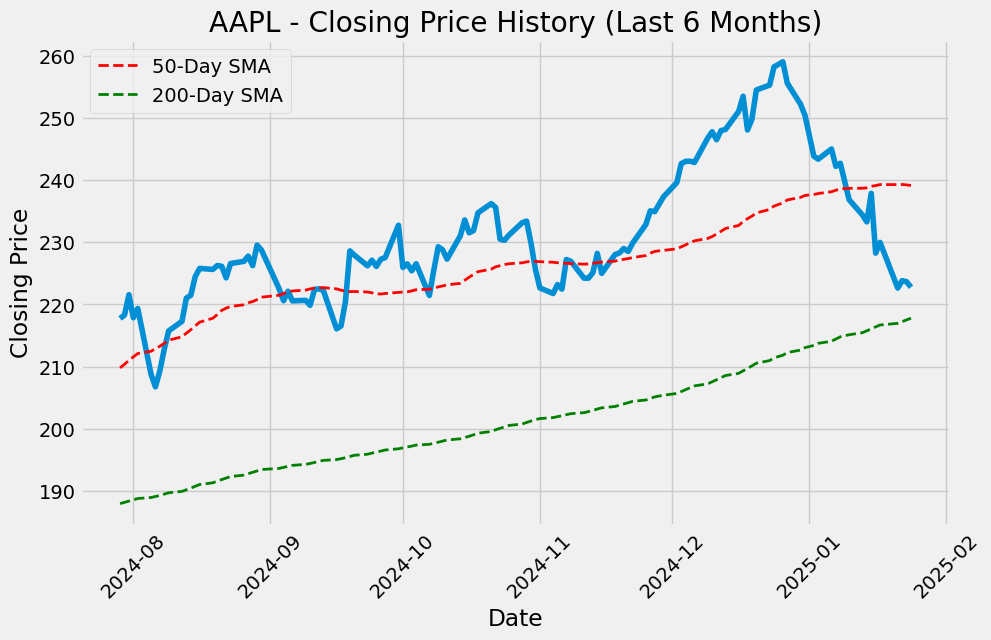

In [160]:
end_date = datetime.now()
start_date = end_date - pd.DateOffset(months=6)

# Filter the dataframe to include only the last 6 months
df_last_6_months = df[df.index >= start_date]
# Plot the closing price for the last 6 months
plt.figure(figsize=(10, 6))
plt.plot(df_last_6_months['Close'])
plt.plot(df_last_6_months['SMA_50'].dropna(), label='50-Day SMA', color='red', linestyle='--', linewidth=2)
plt.plot(df_last_6_months['SMA_200'].dropna(), label='200-Day SMA', color='green', linestyle='--', linewidth=2)
    
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{ticker} - Closing Price History (Last 6 Months)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [161]:
data = df[['Close', 'SMA_50', 'SMA_200']] 

In [162]:
data.dropna()

Price,Close,SMA_50,SMA_200
Ticker,AAPL,,
Date,,,
2021-10-18,143.977982,144.474688,132.992568
2021-10-19,146.149170,144.527151,133.090593
2021-10-20,146.640366,144.599066,133.183251
2021-10-21,146.856537,144.670195,133.298551
2021-10-22,146.080399,144.666266,133.388849
...,...,...,...
2025-01-17,229.979996,239.281792,216.704733
2025-01-21,222.639999,239.270504,216.972742


In [163]:
dataset= data.values

In [164]:
train_data_len= math.ceil(len(dataset) * 0.8)

In [165]:
train_data_len

816

In [166]:
#Data Scaling
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)  # computes the minimum and maximum data for scaling

In [167]:
train_data= scaled_data[0:train_data_len, :]

In [168]:
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
   

        
 

In [169]:
x_train= np.array(x_train)


In [170]:
y_train= np.array(y_train)

In [171]:
# Convert 2d to 3d data: no. of samples (1140), no. of features (1, closing prcie) and no. of timesteps (60)
x_train= np.reshape( x_train, (x_train.shape[0], x_train.shape[1], 1))

In [172]:
# Building the model
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
model= Sequential()
model.add(LSTM(200, return_sequences=True,  input_shape= (x_train.shape[1],1)))
model.add(LSTM(200, return_sequences= False))
#model.add(Dense(25))
model.add(Dense(1))

/home/harshita/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [173]:
# Compile the model
from keras.optimizers import RMSprop

model.compile(optimizer='adam', loss='mean_squared_error')



In [ ]:
#model.fit(x_train, y_train, batch_size=1, epochs=1)

early_stop = EarlyStopping(monitor='loss', patience=3)
model.fit(x_train, y_train, batch_size=128, epochs=50, callbacks=[early_stop])


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - loss: 0.0633  
Epoch 2/50


In [122]:
test_data= scaled_data[train_data_len-60:, :]
x_test=[]
y_test= dataset[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [123]:
x_test= np.array(x_test)
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [124]:
predictions= model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step


In [125]:
predictions_full = np.zeros((predictions.shape[0], 3))

# Fill the first column with predictions (Close price)
predictions_full[:, 0] = predictions.flatten()

# Now inverse-transform the data
predictions_full = scaler.inverse_transform(predictions_full)

# Extract the predicted 'Close' values
predicted_close = predictions_full[:, 0]

In [126]:
y_test_close = y_test[:, 0]
rmse = np.sqrt(np.mean((predicted_close - y_test_close)**2))
print("RMSE: ", rmse)

RMSE:  4.627271935204803


In [127]:
rmse

np.float64(4.627271935204803)

In [128]:
from sklearn.metrics import r2_score

In [129]:
r2_score(predicted_close, y_test_close)

0.9614131396950099

/tmp/ipykernel_80072/3298435915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_close


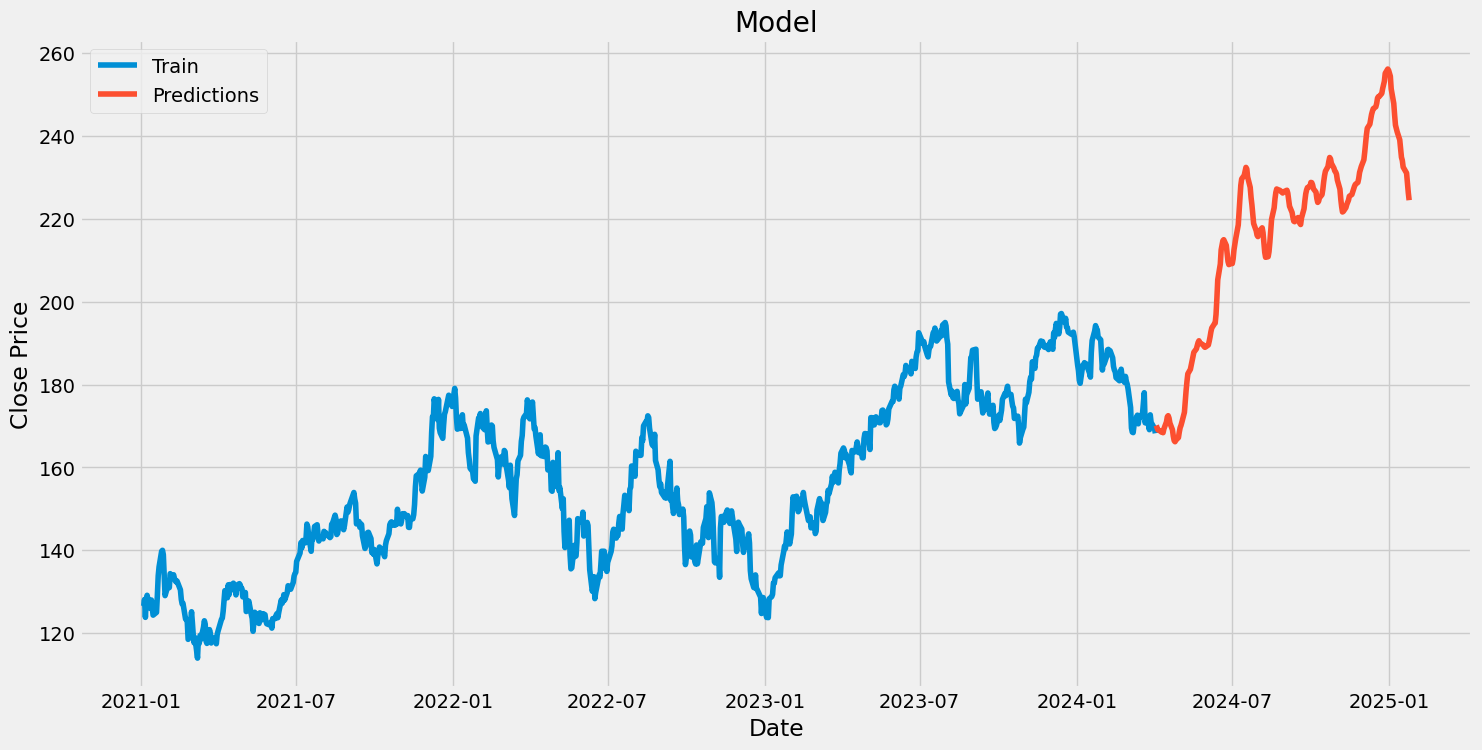

In [130]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predicted_close

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Predictions']])
plt.legend(['Train', 'Predictions'])
plt.show()

In [131]:
valid

Price,Close,SMA_50,SMA_200,Predictions
Ticker,AAPL,,,
Date,,,,
2024-04-03,169.038361,179.256480,182.275559,170.126880
2024-04-04,168.211365,178.736138,182.198973,169.549318
2024-04-05,168.968613,178.244475,182.125727,169.038690
2024-04-08,167.842682,177.736861,182.052062,168.775192
2024-04-09,169.058273,177.288388,181.969389,168.525641
...,...,...,...,...
2025-01-17,229.979996,239.281792,216.704733,232.489109
2025-01-21,222.639999,239.270504,216.972742,231.047211


In [132]:
# Get the last 60 days of data
last_60_days = scaled_data[-60:,0]  # Use the scaled dataset


In [133]:
last_60_days.shape

(60,)

In [134]:
forecast_input = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))


In [135]:
forecast = []

# Predict for the next 7 days
for day in range(7):
    predicted_price = model.predict(forecast_input)
    forecast.append(predicted_price[0, 0])

    # Update the input with the new prediction
    new_input = np.append(forecast_input[0, 1:, 0], predicted_price[0, 0])
    forecast_input = np.reshape(new_input, (1, 60, 1))

# Inverse transform the predictions
forecast_full = np.zeros((len(forecast), 3))
forecast_full[:, 0] = forecast
predicted_prices = scaler.inverse_transform(forecast_full)[:, 0]

# Print predictions
print("Predicted stock prices for the next 7 days:")
for i, price in enumerate(predicted_prices, 1):
    print(f"Day {i}: {price:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicted stock prices for the next 7 days:
Day 1: 223.11
Day 2: 222.31
Day 3: 221.86
Day 4: 221.63
Day 5: 221.54
Day 6: 221.53
Day 7: 221.56


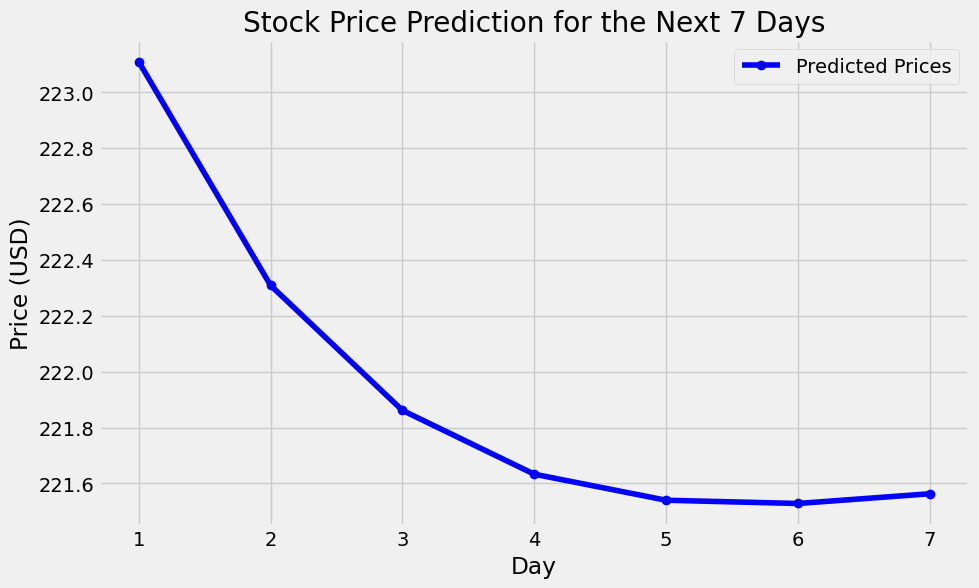

In [136]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), predicted_prices, marker='o', linestyle='-', color='b', label='Predicted Prices')
plt.title('Stock Price Prediction for the Next 7 Days')
plt.xlabel('Day')
plt.ylabel('Price (USD)')
plt.xticks(range(1, 8))  # Set x-ticks for days 1 to 7
plt.grid(True)
plt.legend()
plt.show()